# 인공신경망 손글씩 인식

In [1]:
# 필요한 패키지 가져오기

import tensorflow as tf
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Input, Dense, Dropout
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical

In [2]:
# 하이퍼 파라미터 설정

batch_size = 128
num_classes = 10
epochs = 10

In [3]:
# 데이터 가져오기

(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [6]:
y_train.shape

(60000,)

In [7]:
y_train[0]

5

In [8]:
import numpy as np
np.min(x_train)

0

In [9]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [10]:
x_test.shape

(10000, 28, 28)

In [11]:
y_test.shape

(10000,)

In [12]:
x_train[0].dtype

dtype('uint8')

In [13]:
# 데이터 전처리

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

60000 train samples
10000 test samples


In [14]:
x_train.shape

(60000, 784)

In [15]:
x_train[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [16]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [31]:
# 목표 변수 전처리 - one-hot 인코딩

y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

In [18]:
y_train.shape

(60000, 10)

In [19]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [20]:
y_test.shape

(10000, 10)

In [21]:
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [22]:
# 모형 구조 정의하기

model = Sequential()
model.add(Input(shape=(784,)))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                5130      
                                                                 
Total params: 669706 (2.55 MB)
Trainable params: 669706 (2.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [23]:
# 학습 정의하기

model.compile(loss='categorical_crossentropy',
              metrics=['accuracy'],
              optimizer='adam')

In [24]:
# 학습하기

history = model.fit(x_train, y_train,
                    batch_size=batch_size, epochs=epochs,
                    verbose=1, validation_split=0.3)

Epoch 1/10
329/329 [==============================] - 2s 5ms/step - loss: 0.2938 - accuracy: 0.9128 - val_loss: 0.1543 - val_accuracy: 0.9528
Epoch 2/10
329/329 [==============================] - 2s 5ms/step - loss: 0.1162 - accuracy: 0.9644 - val_loss: 0.1100 - val_accuracy: 0.9680
Epoch 3/10
329/329 [==============================] - 2s 5ms/step - loss: 0.0818 - accuracy: 0.9737 - val_loss: 0.0967 - val_accuracy: 0.9711
Epoch 4/10
329/329 [==============================] - 2s 5ms/step - loss: 0.0606 - accuracy: 0.9808 - val_loss: 0.0989 - val_accuracy: 0.9721
Epoch 5/10
329/329 [==============================] - 2s 5ms/step - loss: 0.0448 - accuracy: 0.9855 - val_loss: 0.1068 - val_accuracy: 0.9706
Epoch 6/10
329/329 [==============================] - 2s 5ms/step - loss: 0.0417 - accuracy: 0.9860 - val_loss: 0.0960 - val_accuracy: 0.9748
Epoch 7/10
329/329 [==============================] - 2s 5ms/step - loss: 0.0362 - accuracy: 0.9880 - val_loss: 0.0878 - val_accuracy: 0.9776
Epoch 

In [25]:
# 성능 평가하기

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.07931844890117645
Test accuracy: 0.979200005531311


In [26]:
score

[0.07931844890117645, 0.979200005531311]

In [27]:
history.history['val_loss']

[0.15430089831352234,
 0.10996948182582855,
 0.09668654948472977,
 0.09892082959413528,
 0.1067822203040123,
 0.0959542840719223,
 0.08782569319009781,
 0.09506545215845108,
 0.09152363985776901,
 0.10440999269485474]

In [28]:
#성능 그래프로 그리기

# graph
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

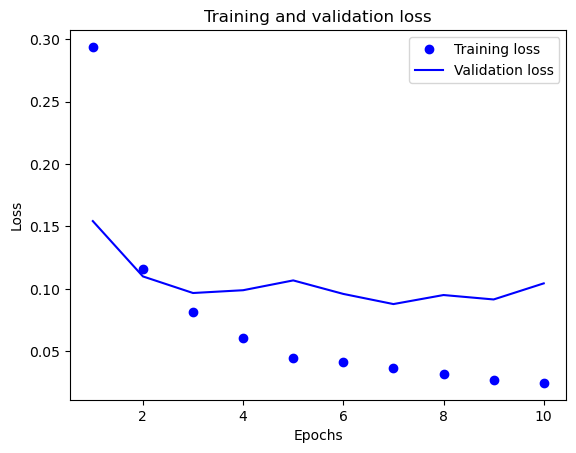

<Figure size 640x480 with 0 Axes>

In [29]:
epoch_range = range(1, len(acc) + 1)
epoch_range
plt.plot(epoch_range, loss, 'bo', label='Training loss')
plt.plot(epoch_range, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.figure()
plt.show()

<Figure size 640x480 with 0 Axes>

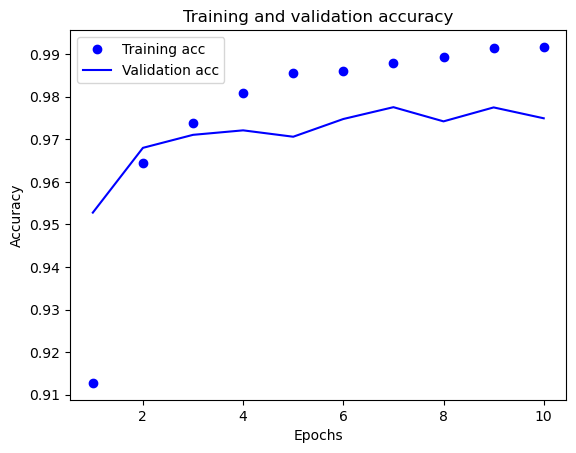

<Figure size 640x480 with 0 Axes>

In [30]:
plt.plot(epoch_range, acc, 'bo', label='Training acc')
plt.plot(epoch_range, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.figure()